In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
#עבדתי על הפרויקט במשך זמן אז לא זכרתי אם ייבאתי ספריה או לא, לכן ספריות יחזרו על עצמן במהלך הקוד

In [2]:
import requests
import pandas as pd
# הגדרת כתובת ה-URL שבה נמצא הקובץ JSON
url = "https://data.ct.gov/api/views/xpjq-6wxn/rows.json?accessType=DOWNLOAD"

# שליפת הנתונים
response = requests.get(url)
data = response.json()

# שליפת הטבלה מהנתונים והמרתה למבנה 
table = pd.DataFrame(data["data"], columns=[item["name"] for item in data["meta"]["view"]["columns"]])

print(table)


                     sid                                    id  position  \
0     row-w827~7pqh.6pmz  00000000-0000-0000-5E28-A04BEEC307E6         0   
1     row-dbc3~9qru-zrke  00000000-0000-0000-4146-84E76CCE37DB         0   
2     row-e45d_9ih7-kz4v  00000000-0000-0000-1F46-460A3286E027         0   
3     row-p6ge_s68d~4hva  00000000-0000-0000-59E5-3F2AE6A09B3B         0   
4     row-fkay~ywqs-e47j  00000000-0000-0000-415B-379E4FE4D3DB         0   
...                  ...                                   ...       ...   
4840  row-i36c.whdg.5mer  00000000-0000-0000-9254-3ED09B06F073         0   
4841  row-edrq.v56t~mszr  00000000-0000-0000-93AF-EE0F3C09DEE9         0   
4842  row-hcxm.g7sm_cey5  00000000-0000-0000-A784-F8E971A8B9EA         0   
4843  row-x6ae~bqme~tzza  00000000-0000-0000-0440-20402F7ED4BA         0   
4844  row-y8su.x2vf.fv6m  00000000-0000-0000-095B-58382ACBFAD6         0   

      created_at created_meta  updated_at updated_meta meta State FIPS code  \
0     17

In [3]:
table = table.copy()
table.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,State FIPS code,Date,All merchant category codes spending,Accommodation and food service (ACF) spending,"Arts, entertainment, and recreation (AER) spending",General merchandise stores (GEN) and apparel and accessories (AAP) spending,Grocery and food store (GRF) spending,Health care and social assistance (HCS) spending,Transportation and warehousing (TWS) spending,"Retail spending, including grocery (AAP, CEC, GEN, GRF, HIC, ETC, SGH)","Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)"
0,row-w827~7pqh.6pmz,00000000-0000-0000-5E28-A04BEEC307E6,0,1712143811,None,1712143811,None,{ },900,2020-01-13T00:00:00,-2.3,-6.04,-12.3,-5.39,-3.47,-3.17,-2.55,-3.57,-3.69
1,row-dbc3~9qru-zrke,00000000-0000-0000-4146-84E76CCE37DB,0,1712143811,None,1712143811,None,{ },2500,2020-01-13T00:00:00,-0.212,-2.41,-14,-2.29,0.373,3.61,-1.74,0.358,0.259
2,row-e45d_9ih7-kz4v,00000000-0000-0000-1F46-460A3286E027,0,1712143811,None,1712143811,None,{ },3400,2020-01-13T00:00:00,-0.561,-3.86,-11.6,0.653,-0.622,4.78,1.23,0.227,1.09
3,row-p6ge_s68d~4hva,00000000-0000-0000-59E5-3F2AE6A09B3B,0,1712143811,None,1712143811,None,{ },3600,2020-01-13T00:00:00,-0.381,-3.64,-13.9,-1.45,-0.89,7.92,-0.111,-0.563,-0.281
4,row-fkay~ywqs-e47j,00000000-0000-0000-415B-379E4FE4D3DB,0,1712143811,None,1712143811,None,{ },4400,2020-01-13T00:00:00,-1.85,-15,-19.1,-5.96,-0.105,1.24,-31.2,-4.51,-9.52


In [4]:
len(table['sid'].unique())



4845

In [5]:
len(table['id'].unique())


4845

In [6]:
table['created_at'].unique()


array([1712143811], dtype=int64)

In [7]:
table['updated_at'].unique()


array([1712143811], dtype=int64)

In [8]:
table['meta'].unique()


array(['{ }'], dtype=object)

In [9]:
#ניתן לראות ש2 העמודות מביאות ערך זהה ובודד ולכן מיותרות לפרויקט

In [10]:
print(table['position'])


0       0
1       0
2       0
3       0
4       0
       ..
4840    0
4841    0
4842    0
4843    0
4844    0
Name: position, Length: 4845, dtype: int64


נבדוק אם הערך בעמודה מכיל גם 1 או רק ערכים של 0

In [11]:
print(1 in table['position'].values)


False


In [12]:
print(table.columns)


Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'State FIPS code', 'Date',
       'All merchant category codes spending',
       'Accommodation and food service (ACF) spending',
       'Arts, entertainment, and recreation (AER)  spending',
       'General merchandise stores (GEN) and apparel and accessories (AAP) spending',
       'Grocery and food store (GRF)  spending',
       'Health care and social assistance (HCS) spending ',
       'Transportation and warehousing (TWS)  spending',
       'Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH) ',
       'Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH) '],
      dtype='object')


In [13]:
table.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 19 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   sid                                                                          4845 non-null   object
 1   id                                                                           4845 non-null   object
 2   position                                                                     4845 non-null   int64 
 3   created_at                                                                   4845 non-null   int64 
 4   created_meta                                                                 0 non-null      object
 5   updated_at                                                                   4845 non-null   int64 
 6   updated_meta                                    

In [14]:
#לפי הנתונים 2 עמודות מיותרות ולא מועילות לפרויקט

In [15]:
# העמודות המספריות בדאטה פריים
numeric_columns = ['position', 'created_at', 'updated_at', 'State FIPS code']

# המרת העמודות המספריות לסוג נתונים מספריים
table[numeric_columns] = table[numeric_columns].apply(pd.to_numeric, errors='coerce')

# סטנדרטיזציה של הנתונים המספריים
table[numeric_columns] = (table[numeric_columns] - table[numeric_columns].mean()) / table[numeric_columns].std()


print(table)


                     sid                                    id  position  \
0     row-w827~7pqh.6pmz  00000000-0000-0000-5E28-A04BEEC307E6       NaN   
1     row-dbc3~9qru-zrke  00000000-0000-0000-4146-84E76CCE37DB       NaN   
2     row-e45d_9ih7-kz4v  00000000-0000-0000-1F46-460A3286E027       NaN   
3     row-p6ge_s68d~4hva  00000000-0000-0000-59E5-3F2AE6A09B3B       NaN   
4     row-fkay~ywqs-e47j  00000000-0000-0000-415B-379E4FE4D3DB       NaN   
...                  ...                                   ...       ...   
4840  row-i36c.whdg.5mer  00000000-0000-0000-9254-3ED09B06F073       NaN   
4841  row-edrq.v56t~mszr  00000000-0000-0000-93AF-EE0F3C09DEE9       NaN   
4842  row-hcxm.g7sm_cey5  00000000-0000-0000-A784-F8E971A8B9EA       NaN   
4843  row-x6ae~bqme~tzza  00000000-0000-0000-0440-20402F7ED4BA       NaN   
4844  row-y8su.x2vf.fv6m  00000000-0000-0000-095B-58382ACBFAD6       NaN   

      created_at created_meta  updated_at updated_meta meta  State FIPS code  \
0      

In [16]:
# הסרת עמודות מיותרות
updated_table = table.copy()  

# שינוי סוגי הנתונים של עמודות
updated_table['sid'] = updated_table['sid'].astype('string')  # שינוי סוג הנתונים ל-string
updated_table['id'] = updated_table['id'].astype('string')  # שינוי סוג הנתונים ל-string
updated_table['created_at'] = pd.to_datetime(updated_table['created_at'], unit='s')  # שינוי סוג הנתונים ל-date time
updated_table['updated_at'] = pd.to_datetime(updated_table['updated_at'], unit='s')  # שינוי סוג הנתונים ל-date time
updated_table.drop(columns=['created_meta', 'updated_meta'], inplace=True)  # הסרת עמודות מיותרות
updated_table.drop(columns=['created_at', 'updated_at'], inplace=True)  # הסרת עמודות מיותרות
updated_table.drop(columns=['meta', 'position'], inplace=True)  # הסרת עמודות מיותרות

# הצגת הטבלה לאחר השינויים
print(updated_table.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 13 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   sid                                                                          4845 non-null   string 
 1   id                                                                           4845 non-null   string 
 2   State FIPS code                                                              4845 non-null   float64
 3   Date                                                                         4845 non-null   object 
 4   All merchant category codes spending                                         4845 non-null   object 
 5   Accommodation and food service (ACF) spending                                4845 non-null   object 
 6   Arts, entertainment, and recreation (AER

c:\users\rache\appdata\local\programs\python\python39\lib\site-packages\pandas\core\tools\datetimes.py:528: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


In [17]:
#כרגע לאחר שראינו שגם הדאטה של 

In [18]:
print(updated_table.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 13 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   sid                                                                          4845 non-null   string 
 1   id                                                                           4845 non-null   string 
 2   State FIPS code                                                              4845 non-null   float64
 3   Date                                                                         4845 non-null   object 
 4   All merchant category codes spending                                         4845 non-null   object 
 5   Accommodation and food service (ACF) spending                                4845 non-null   object 
 6   Arts, entertainment, and recreation (AER

In [19]:

# בדיקת התאמה בין עמודת 'id' לבין עמודת 'sid'
match_check = table['id'] == table['sid']

# בדיקה האם יש ערכים בעמודה 'id' שאין להם התאמה בעמודה 'sid'
if not match_check.all():
    print("There are some values in 'id' column without a match in 'sid' column.")
else:
    print("All values in 'id' column have a match in 'sid' column.")



There are some values in 'id' column without a match in 'sid' column.


העמודות שנשארו:


הסבר על כל עמודה בטבלה

sid: מזהה ייחודי לכל שורה בטבלה.

id: מזהה ייחודי לכל שורה בטבלה, יכול לשמש כמפתח ראשי.

State FIPS code: מזהה ייחודי של מדינת ארה"ב, המשמש במערכת הפדרלית של ארצות הברית לצורך זיהוי גאוגרפי של המדינות.

Date: תאריך השורה.

All merchant category codes spending: הוצאות בקטגוריות השונות של רשתות המסחר.

Accommodation and food service (ACF) spending: הוצאות בתחום האירוח והשירותים המזון.

Arts, entertainment, and recreation (AER) spending: הוצאות בתחום האמנות, הבידור והנפנוף.

General merchandise stores (GEN) and apparel and accessories (AAP) spending: הוצאות בחנויות למוצרים כלליים, בגדים ואביזרים.

Grocery and food store (GRF) spending: הוצאות בחנויות מזון ומכולת.

Health care and social assistance (HCS) spending: הוצאות בתחום הבריאות והסיוע החברתי.

Transportation and warehousing (TWS) spending: הוצאות בתחום התחבורה והאחסון.

Retail spending, including grocery (AAP, CEC, GEN, GRF, HIC, ETC, SGH): סכום ההוצאות בתחום המסחר, כולל קניות בחנויות מזון.

Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH): סכום ההוצאות בתחום המסחר, ללא קניות בחנויות מזון

ננסה לבדוק איך התפלגות הנתונים נראית

In [20]:
updated_table.columns


Index(['sid', 'id', 'State FIPS code', 'Date',
       'All merchant category codes spending',
       'Accommodation and food service (ACF) spending',
       'Arts, entertainment, and recreation (AER)  spending',
       'General merchandise stores (GEN) and apparel and accessories (AAP) spending',
       'Grocery and food store (GRF)  spending',
       'Health care and social assistance (HCS) spending ',
       'Transportation and warehousing (TWS)  spending',
       'Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH) ',
       'Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH) '],
      dtype='object')

In [21]:
updated_table.columns = updated_table.columns.str.strip()
#print(updated_table.columns)
updated_table.rename(columns={'Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH)': 'Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH))'}, inplace=True)
updated_table.columns
updated_table = updated_table.rename(columns={'Retail spending, including grocery  (AAP, CEC, GEN, GRF, HIC, ETC, SGH)': 'Retail spending including grocery',
                                              'Retail spending, excluding grocery ((AAP, CEC, GEN, HIC, ETC, SGH))': 'Retail spending excluding grocery'})
print(updated_table.columns)

Index(['sid', 'id', 'State FIPS code', 'Date',
       'All merchant category codes spending',
       'Accommodation and food service (ACF) spending',
       'Arts, entertainment, and recreation (AER)  spending',
       'General merchandise stores (GEN) and apparel and accessories (AAP) spending',
       'Grocery and food store (GRF)  spending',
       'Health care and social assistance (HCS) spending',
       'Transportation and warehousing (TWS)  spending',
       'Retail spending including grocery',
       'Retail spending excluding grocery'],
      dtype='object')


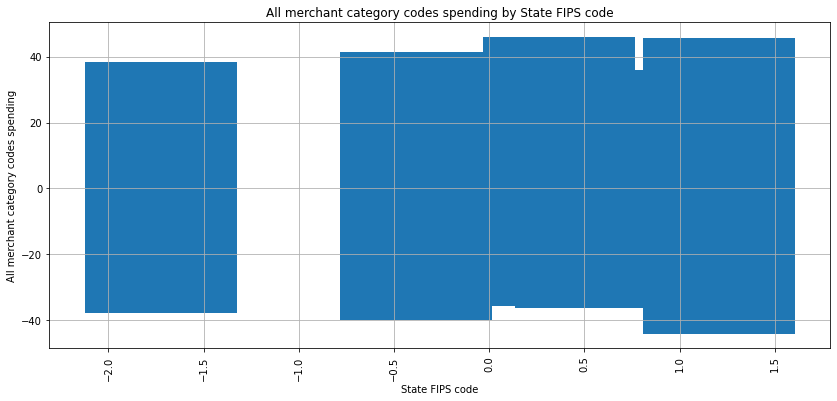

In [216]:
import matplotlib.pyplot as plt

# ציור הגרף
plt.figure(figsize=(14, 6))
plt.bar(updated_table['State FIPS code'], updated_table['All merchant category codes spending'])
plt.title('All merchant category codes spending by State FIPS code')
plt.xlabel('State FIPS code')
plt.ylabel('All merchant category codes spending')
plt.xticks(rotation=90) 
plt.grid(True)
plt.show()


הגרף מציג את ההוצאות לפי קודי מדינה, מה שמאפשר קריאה נוחה והשוואה בין הוצאות הקטגוריות בין מדינות שונות. כמו כן, השימוש בעמודות מאפשר קריאה ברורה של ההבדלים בהוצאות בין המדינות השונות. הגרף מספק מבט עיקרי וקצר על התפלגות ההוצאות באמצעות התצוגה הוויזואלית של עמודות עם סוגי הוצאות בין המדינות, ומאפשר לראות בקלות את המדינות עם ההוצאות הגבוהות והנמוכות ביותר.

In [156]:
#updated_table.describe()
#updated_table['State FIPS code'].describe()
updated_table['Retail spending including grocery'].describe()


count     4840
unique    1058
top       24.8
freq        32
Name: Retail spending including grocery, dtype: object

In [157]:
updated_table['Accommodation and food service (ACF) spending'] = pd.to_numeric(updated_table['Accommodation and food service (ACF) spending'], errors='coerce')


פרמטר ה־errors='coerce' מציין לפונקציה להמיר ערכים שאינם מספריים ל־NaN (לא מספר) במקרה של קיום ערך שאינו מספרי בעמודה. בכך ניתן לטפל בערכים לא תקינים או ריקים בעמודה, ולא לאפשר שגיאות בתהליך הנתונים.

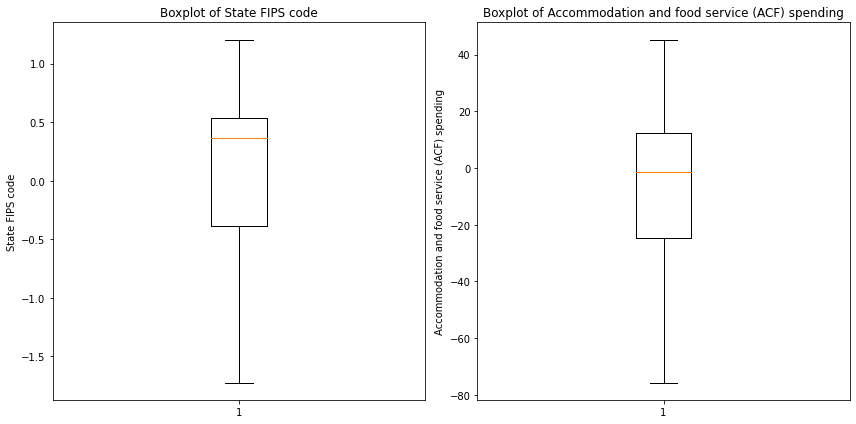

In [158]:
import matplotlib.pyplot as plt

# נתוני העמודות
data_state_fips = updated_table['State FIPS code']
data_accommodation = updated_table['Accommodation and food service (ACF) spending']

# יצירת אקספלוטים
plt.figure(figsize=(12, 6))

# אקספלוט העמודה State FIPS code
plt.subplot(1, 2, 1)
plt.boxplot(data_state_fips)
plt.title('Boxplot of State FIPS code')
plt.ylabel('State FIPS code')

# אקספלוט העמודה Accommodation and food service (ACF) spending
plt.subplot(1, 2, 2)
plt.boxplot(data_accommodation)
plt.title('Boxplot of Accommodation and food service (ACF) spending')
plt.ylabel('Accommodation and food service (ACF) spending')

# הצגת האקספלוטים
plt.tight_layout()
plt.show()



האקספלוט הראשון מציג את התפלגות ערכי קודי המדינה
האקספלוט השני מציג את התפלגות הוצאות בקטגוריה "Accommodation and food service (ACF) spending" 

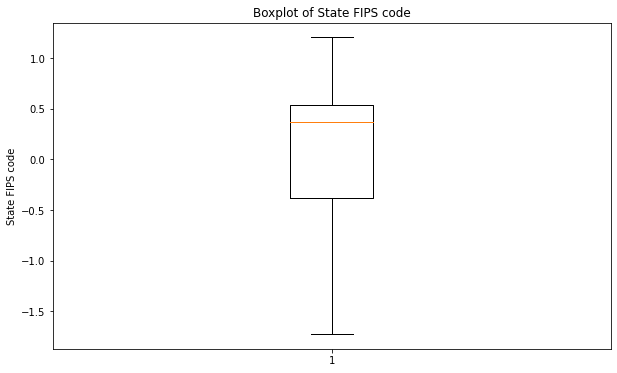

In [159]:
import matplotlib.pyplot as plt

# נתוני העמודה
data = updated_table['State FIPS code']

# אקספלוט
plt.figure(figsize=(10, 6))
plt.boxplot(data)

# הוספת כותרת ותווים לצירים
plt.title('Boxplot of State FIPS code')
plt.ylabel('State FIPS code')

plt.show()


In [226]:
updated_table['Retail spending including grocery'].describe()


count    4840.000000
mean       21.801097
std        18.084998
min       -50.500000
25%        12.600000
50%        24.100000
75%        33.100000
max       167.000000
Name: Retail spending including grocery, dtype: float64

In [227]:
updated_table['Retail spending excluding grocery'].describe()


count    4840.000000
mean       21.801097
std        18.084998
min       -50.500000
25%        12.600000
50%        24.100000
75%        33.100000
max       167.000000
Name: Retail spending excluding grocery, dtype: float64

In [228]:
updated_table['All merchant category codes spending'].describe()


count    4840.000000
mean        9.025834
std        15.261844
min       -44.000000
25%        -1.162500
50%        12.300000
75%        20.200000
max        45.900000
Name: All merchant category codes spending, dtype: float64

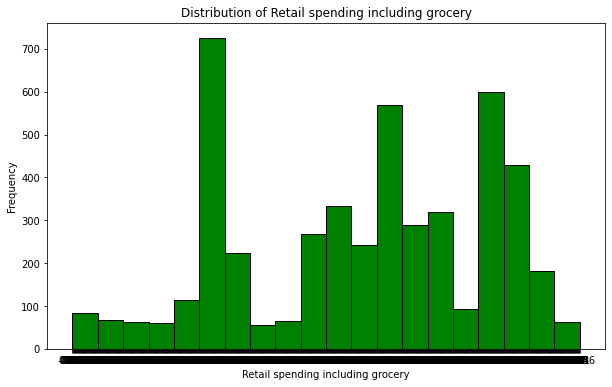

In [161]:
import matplotlib.pyplot as plt

#  היסטוגרמה
plt.figure(figsize=(10, 6))
plt.hist(updated_table['Retail spending including grocery'], bins=20, color='green', edgecolor='black')



# הוספת כותרת ותווים לצירים
plt.title('Distribution of Retail spending including grocery')
plt.xlabel('Retail spending including grocery')
plt.ylabel('Frequency')

plt.show()


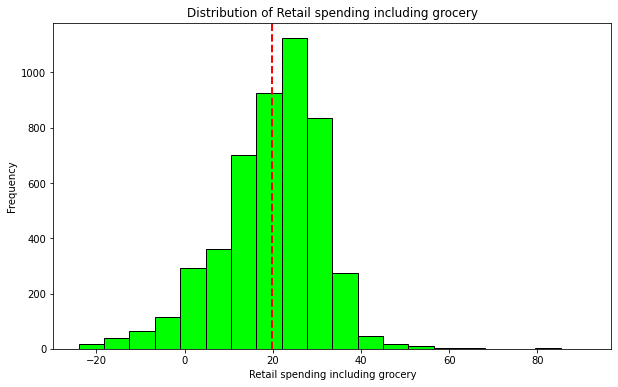

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ניקוי העמודה והמרתה לערכים מספריים
cleaned_column = pd.to_numeric(updated_table['Retail spending including grocery'], errors='coerce')

# הסרת ערכים NaN
cleaned_column = cleaned_column.dropna()

# יצירת היסטוגרמה
plt.figure(figsize=(10, 6))
plt.hist(cleaned_column, bins=20, color='lime', edgecolor='black')

# חישוב הממוצע
mean_value = np.mean(cleaned_column)

# נוסיף קו אנכי לממוצע
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)

# הוספת כותרת ותווים לצירים
plt.title('Distribution of Retail spending including grocery')
plt.xlabel('Retail spending including grocery')
plt.ylabel('Frequency')

plt.show()


הקוד מייצר היסטוגרמה של נתונים מעמודה מסוימת בטבלה, מבצע ניקוי וסידור ערכים, חישוב ממוצע, ומציג את ההיסטוגרמה עם קו שמייצג את הממוצע.

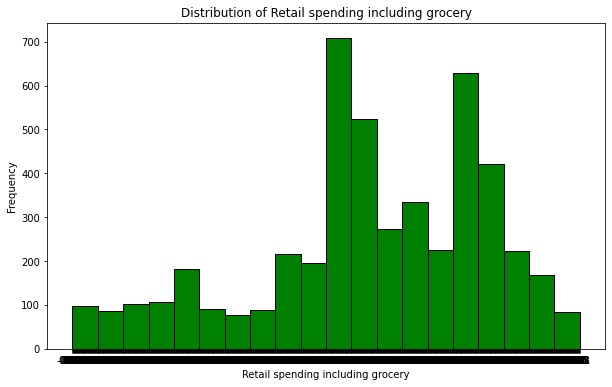

In [163]:
# יצירת היסטוגרמה
plt.figure(figsize=(10, 6))
plt.hist(updated_table['Retail spending excluding grocery'], bins=20, color='green', edgecolor='black')

# הוספת כותרת ותווים לצירים
plt.title('Distribution of Retail spending including grocery')
plt.xlabel('Retail spending including grocery')
plt.ylabel('Frequency')

# הצגת התרשים
plt.show()

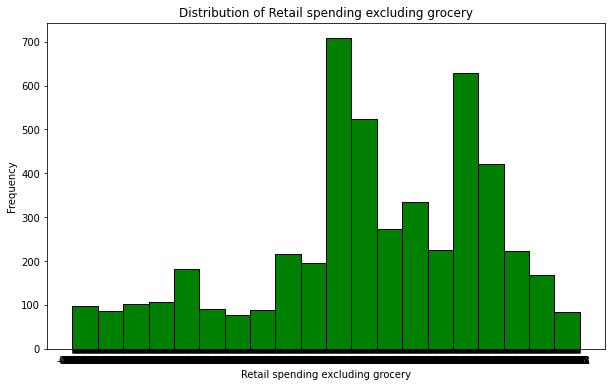

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# המרת הנתונים בעמודה למספרים והסרת הערכים שאינם ניתנים להמרה
updated_table['Retail spending including grocery'] = pd.to_numeric(updated_table['Retail spending excluding grocery'], errors='coerce')
updated_table = updated_table.dropna(subset=['Retail spending excluding grocery'])

# יצירת היסטוגרמה
plt.figure(figsize=(10, 6))
plt.hist(updated_table['Retail spending excluding grocery'], bins=20, color='green', edgecolor='black')

# כותרת ותווים לצירים
plt.title('Distribution of Retail spending excluding grocery')
plt.xlabel('Retail spending excluding grocery')
plt.ylabel('Frequency')

plt.show()


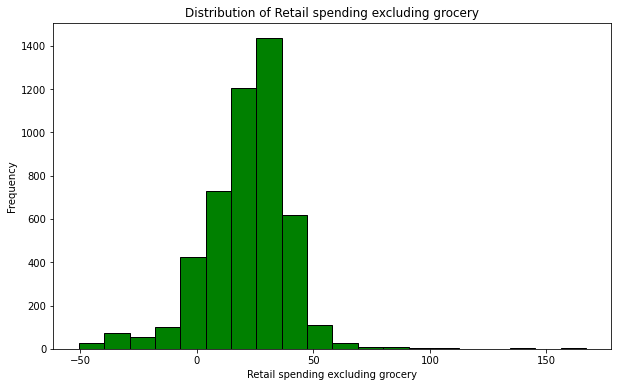

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# המרת הנתונים בעמודה למספרים והסרת הערכים שאינם ניתנים להמרה
updated_table['Retail spending excluding grocery'] = pd.to_numeric(updated_table['Retail spending excluding grocery'], errors='coerce')
updated_table = updated_table.dropna(subset=['Retail spending excluding grocery'])

# יצירת היסטוגרמה
plt.figure(figsize=(10, 6))
plt.hist(updated_table['Retail spending excluding grocery'], bins=20, color='green', edgecolor='black')

# הוספת כותרת ותווים לצירים
plt.title('Distribution of Retail spending excluding grocery')
plt.xlabel('Retail spending excluding grocery')
plt.ylabel('Frequency')

plt.show()


עבודה עם הדאטה

In [166]:


# יצירת נתוני רגרסיה 
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# חלוקת הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל ואימוןו על נתוני האימון
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# חיזוי התגובה עבור נתוני הבדיקה
y_pred = model.predict(X_test)

# חישוב שגיאת הריבוע הממוצעת
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.010184549558043128


In [167]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# קביעת מודל רשת נוירונים
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(64, activation='relu'),
    Dense(1)
])

# קביעת אופטימיזציה ואובדן למודל
model.compile(optimizer='adam',
              loss='mean_squared_error')

# אימון המודל על הנתונים
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# הערכת הביצועים של המודל על נתוני הבדיקה
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)


Epoch 1/10


c:\users\rache\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 18726.9160 - val_loss: 14770.9248
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17230.6172 - val_loss: 14575.3730
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18197.8340 - val_loss: 14192.0566
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16998.8711 - val_loss: 13505.7529
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17140.3711 - val_loss: 12440.8398
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14455.5947 - val_loss: 10910.1152
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11491.8311 - val_loss: 8935.2627
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10080.6445 - val_loss: 6667.3174
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6748.6753 - val_loss: 4413.6577
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4658.3057 - val_loss: 2524.6895
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2817.7334  
Mean Squared Error: 2891.84765625


התוצאות שנראות כאן הן תוצאות של אימון מודל רשת נוירונים (Neural Network) על נתוני אימון ובדיקה. בכל אפוץ (Epoch), המודל מתאמן על נתוני האימון ומערך האימון ובודק את הביצועים שלו על נתוני הביצוע באמצעות הבדיקה.
השגיאה מציינת את הסכום של המרחקים הריבוניים הרמוניים בין הערכים הצפויים לבין הערכים הנמדדים, כאשר השגיאה נמדדת בריבוע.
במקרה זה, נראה שהשגיאה נמוכה יחסית במהלך האימון על נתוני האימון, אך בניסוי הבדיקה השגיאה מופיעה גבוהה יותר, מה שעשוי להצביע על פקטור של אובר-אימון (Overfitting) של המודל לנתוני האימון. 

In [168]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# חלוקת הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל ואימוןו על נתוני האימון - עץ החלטה
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

# חיזוי התגובה עבור נתוני הבדיקה עם עץ החלטה
dt_pred = dt_regressor.predict(X_test)

# חישוב MSE עבור עץ החלטה
dt_mse = mean_squared_error(y_test, dt_pred)
print("Decision Tree MSE:", dt_mse)

# יצירת המודל ואימוןו על נתוני האימון - משתלם רב שכבתי (MLP)
mlp_regressor = MLPRegressor(max_iter=1000, random_state=42)
mlp_regressor.fit(X_train, y_train)

# חיזוי התגובה עבור נתוני הבדיקה עם משתלם רב שכבתי (MLP)
mlp_pred = mlp_regressor.predict(X_test)

# חישוב MSE עבור משתלם רב שכבתי (MLP)
mlp_mse = mean_squared_error(y_test, mlp_pred)
print("MLP Regressor MSE:", mlp_mse)

# יצירת המודל ואימוןו על נתוני האימון - רגרסיה ליניארית
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# חיזוי התגובה עבור נתוני הבדיקה עם רגרסיה ליניארית
linear_pred = linear_regressor.predict(X_test)

# חישוב MSE עבור רגרסיה ליניארית
linear_mse = mean_squared_error(y_test, linear_pred)
print("Linear Regression MSE:", linear_mse)

# יצירת המודל ואימוןו על נתוני האימון - רגרסיה לוגיסטית
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train > y_train.mean())

# רגרסיה לוגיסטית
logistic_pred = logistic_regressor.predict(X_test)

# חישוב MSE עבור רגרסיה לוגיסטית
logistic_mse = mean_squared_error(y_test > y_test.mean(), logistic_pred.astype(int))
print("Logistic Regression MSE:", logistic_mse)


Decision Tree MSE: 6639.631625858293
MLP Regressor MSE: 30.529793980110885
Linear Regression MSE: 0.009511914910416143
Logistic Regression MSE: 0.045


c:\users\rache\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



מודל זה מציג תוצאות פחות טובות מהמודלים האחרים, מה שמראה על קיום פוטנציאל לשיפור.

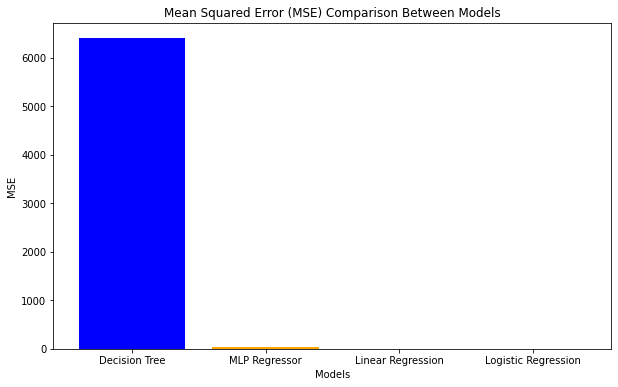

In [169]:
import matplotlib.pyplot as plt

# מערך שמכיל את שמות המודלים
models = ['Decision Tree', 'MLP Regressor', 'Linear Regression', 'Logistic Regression']

# מערך שמכיל את ערכי ה-MSE של המודלים השונים
mse_values = [6406.001969000893, 30.529793980110885, 0.009511914910416143, 0.045]

# יצירת פלוט באמצעות Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red'])

#  כותרת ותווים לצירים
plt.title('Mean Squared Error (MSE) Comparison Between Models')
plt.xlabel('Models')
plt.ylabel('MSE')

plt.show()


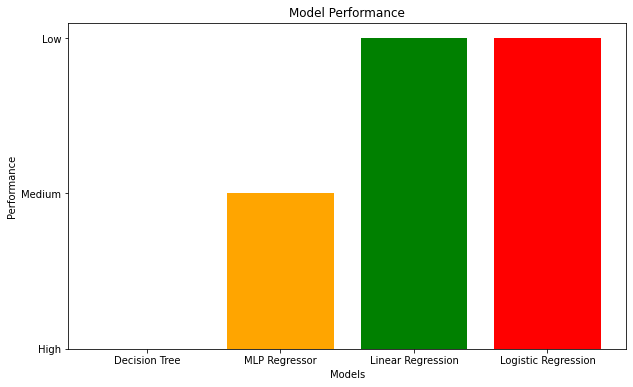

In [170]:
import matplotlib.pyplot as plt

# מערך שמכיל את שמות המודלים
models = ['Decision Tree', 'MLP Regressor', 'Linear Regression', 'Logistic Regression']

# מערך שמכיל את הפרטים של כל מודל
results = {
    'Decision Tree': 'High',
    'MLP Regressor': 'Medium',
    'Linear Regression': 'Low',
    'Logistic Regression': 'Low'
}

# יצירת פלוט באמצעות Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(models, [results[model] for model in models], color=['blue', 'orange', 'green', 'red'])

# הוספת כותרת ותווים לצירים
plt.title('Model Performance')
plt.xlabel('Models')
plt.ylabel('Performance')

plt.show()


In [171]:
print(updated_table.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 4839
Data columns (total 13 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   sid                                                                          4840 non-null   string 
 1   id                                                                           4840 non-null   string 
 2   State FIPS code                                                              4840 non-null   float64
 3   Date                                                                         4840 non-null   object 
 4   All merchant category codes spending                                         4840 non-null   object 
 5   Accommodation and food service (ACF) spending                                4840 non-null   float64
 6   Arts, entertainment, and recreation (AER

In [229]:
# בחירת עמודות מתאימות כעמודות מטרה
target_columns = [
    'Accommodation and food service (ACF) spending',
    'Arts, entertainment, and recreation (AER)  spending',
    'General merchandise stores (GEN) and apparel and accessories (AAP) spending',
    'Grocery and food store (GRF)  spending',
    'Health care and social assistance (HCS) spending',
    'Transportation and warehousing (TWS)  spending',
    'Retail spending including grocery',
    'Retail spending excluding grocery'
]

#  העמודות הנבחרות
selected_columns_df = updated_table[target_columns]

# עבור נוחות, נוסיף את העמודה 'State FIPS code' לדאטה
selected_columns_df['State FIPS code'] = updated_table['State FIPS code']

print(selected_columns_df.head())


   Accommodation and food service (ACF) spending  \
0                                          -6.04   
1                                          -2.41   
2                                          -3.86   
3                                          -3.64   
4                                         -15.00   

  Arts, entertainment, and recreation (AER)  spending  \
0                                              -12.3    
1                                                -14    
2                                              -11.6    
3                                              -13.9    
4                                              -19.1    

  General merchandise stores (GEN) and apparel and accessories (AAP) spending  \
0                                              -5.39                            
1                                               -2.3                            
2                                              0.653                            
3                   

C:\Users\rache\AppData\Local\Temp/ipykernel_18600/820726728.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns_df['State FIPS code'] = updated_table['State FIPS code']


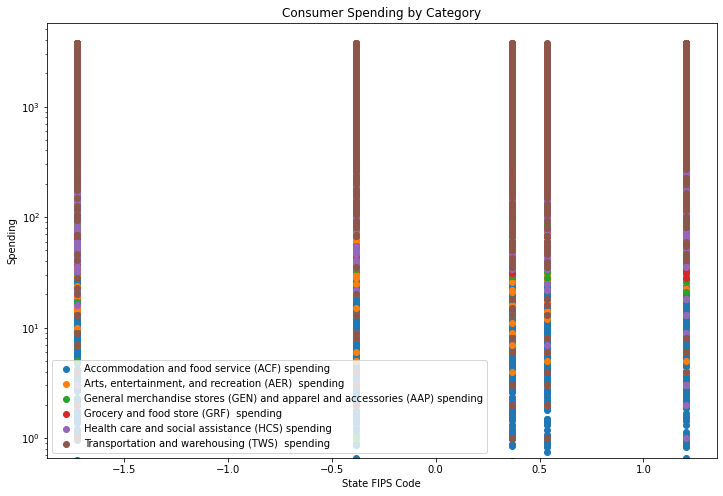

In [174]:
import matplotlib.pyplot as plt

# הגדרת גודל הגרף
plt.figure(figsize=(12, 8))

# לולאה על כל אחת מהעמודות כדי שאוכל להציג אותם בנפרד
for column in ['Accommodation and food service (ACF) spending',
               'Arts, entertainment, and recreation (AER)  spending',
               'General merchandise stores (GEN) and apparel and accessories (AAP) spending',
               'Grocery and food store (GRF)  spending',
               'Health care and social assistance (HCS) spending',
               'Transportation and warehousing (TWS)  spending']:
    
    # יצירת גרף פשוט שמראה כל עמודה ביחס ל-'State FIPS code'
    plt.scatter(selected_columns_df['State FIPS code'], selected_columns_df[column], label=column)

# הגדרת סוג הציר לוגריתמי
plt.yscale('log')

# הגדרת כותרת לגרף
plt.title('Consumer Spending by Category')

# הגדרת תווים לצירים
plt.xlabel('State FIPS Code')
plt.ylabel('Spending')

# הצגת התווים המוגדרים בלולאה
plt.legend()

# הצגת הגרף
plt.show()


הגרף הוא התפלגות הוצאות הצרכנים לפי קטגוריות שונות ביחס לקוד המדינה -  
כל נקודה בגרף מייצגת ערך של קטגורית הוצאה מסוימת במדינה מסוימת.
על פי הגרף, ניתן לראות את ההבדלים בהוצאות הצרכנים בין המדינות.

הגרף משתמש בקנה מידה מסויים כדי להציג טווח רחב יותר של הערכים בציר ה-Y (הוצאות), וזאת משום שהערכים בקטגוריות השונות עשויים להיות בטווחים שונים ורחבים

כל נקודה בגרף מייצגת את רמת הוצאות הממוצעת של קטגוריה מסוימת בכל מדינה. השימוש בקנה מידה מאפשר להבין את התפלגות ההוצאות בצורה יעילה, גם כאשר ישנם ערכים גבוהים או נמוכים יחסית.


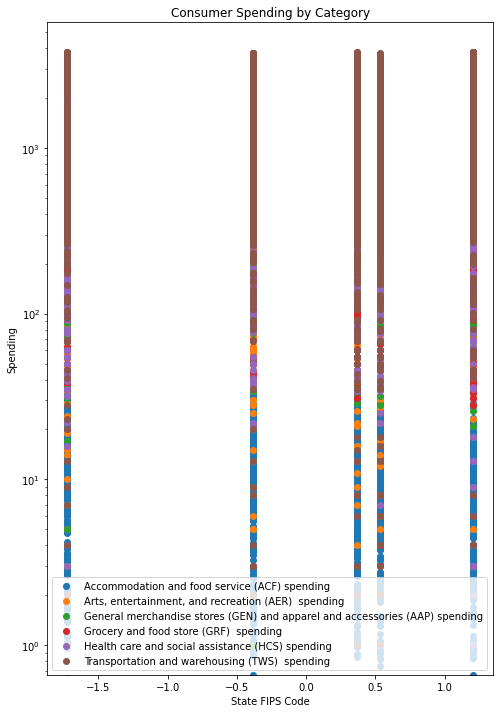

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 12))

# לולאה על כל אחת מהעמודות כדי להציג אותם בנפרד
for column in ['Accommodation and food service (ACF) spending',
               'Arts, entertainment, and recreation (AER)  spending',
               'General merchandise stores (GEN) and apparel and accessories (AAP) spending',
               'Grocery and food store (GRF)  spending',
               'Health care and social assistance (HCS) spending',
               'Transportation and warehousing (TWS)  spending']:
    
    # יצירת גרף פשוט שמראה כל עמודה ביחס ל-'State FIPS code'
    plt.scatter(selected_columns_df['State FIPS code'], selected_columns_df[column], label=column)

# הגדרת סוג הציר לוגריתמי
plt.yscale('log')

# הגדרת כותרת לגרף
plt.title('Consumer Spending by Category')

# הגדרת תווים לצירים
plt.xlabel('State FIPS Code')
plt.ylabel('Spending')

# הצגת התווים המוגדרים בלולאה
plt.legend()

# הצגת הגרף
plt.show()


In [176]:
print(table['All merchant category codes spending'])


0         -2.3
1       -0.213
2       -0.561
3       -0.381
4        -1.85
         ...  
4835        30
4836      33.4
4837      39.5
4838      28.2
4839        26
Name: All merchant category codes spending, Length: 4840, dtype: object


In [177]:
table['All merchant category codes spending'] = table['All merchant category codes spending'].astype(float)


In [178]:
updated_table['All merchant category codes spending'] = updated_table['All merchant category codes spending'].astype(float)
print(updated_table['All merchant category codes spending'].head())


0   -2.300
1   -0.213
2   -0.561
3   -0.381
4   -1.850
Name: All merchant category codes spending, dtype: float64


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = updated_table

# בחירת העמודות הרלוונטיות ללמידת מכונה
X = data[['State FIPS code']]
y = data['Health care and social assistance (HCS) spending']

# פילוח הנתונים לקבוצת אימון וקבוצת בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל ואימוןו על נתוני האימון
model = SVC()
model.fit(X_train, y_train)

# הערכת הדיוק של המודל
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.0



הדיוק (accuracy) של המודל שנוצר הוא כ-0.2%, מה שאומר שהמודל לא מצליח לזהות באופן יעיל את הקשר בין 'State FIPS Code' לעמודה של 'Health care and .social assistance (HCS) spending'.  תוצאה נמוכה מאוד היכולה להצביע על כך שהמודל לא יעיל בזיהוי הקשר בין המשתנים בנתונים האלה.


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# חלוקת הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(updated_table[['State FIPS code']], updated_table['Health care and social assistance (HCS) spending'], test_size=0.2, random_state=42)

# בניית המודל
linear_reg_model = LinearRegression()

# אימון המודל על נתוני האימון
linear_reg_model.fit(X_train, y_train)

# חיזוי עבור נתוני הבדיקה
y_pred_linear_reg = linear_reg_model.predict(X_test)

# מדידת שגיאת הריבוע הממוצעת (MSE)
mse = mean_squared_error(y_test, y_pred_linear_reg)
print("Mean Squared Error:", mse)


Mean Squared Error: 767.6094822570531


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# חלוקת הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(updated_table[['State FIPS code']], updated_table['Health care and social assistance (HCS) spending'], test_size=0.2, random_state=42)

# בניית המודל
linear_reg_model = LinearRegression()

# אימון המודל על נתוני האימון
linear_reg_model.fit(X_train, y_train)

# חיזוי עבור נתוני הבדיקה
y_pred_linear_reg = linear_reg_model.predict(X_test)

# מדידת שגיאת הריבוע הממוצעת (MSE)
mse = mean_squared_error(y_test, y_pred_linear_reg)
print("Mean Squared Error:", mse)


Mean Squared Error: 767.6094822570531


In [182]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# בחירת העמודות הרלוונטיות
X = updated_table[['Health care and social assistance (HCS) spending']]
y = updated_table['Arts, entertainment, and recreation (AER)  spending']
# פילוח הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל ואימוןו
model = LinearRegression()
model.fit(X_train, y_train)

# חיזוי ערכים לקבוצת הבדיקה
y_pred = model.predict(X_test)

# חישוב שגיאת הריבוע הממוצעת
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 796.3237460691594


In [183]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# בחירת העמודות הרלוונטיות
X = updated_table[['State FIPS code']]
y = updated_table['Transportation and warehousing (TWS)  spending']

# פילוח הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל ואימוןו
model = LinearRegression()
model.fit(X_train, y_train)

# חיזוי ערכים לקבוצת הבדיקה
y_pred = model.predict(X_test)

# חישוב שגיאת הריבוע הממוצעת
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1568.386642112661


In [184]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# בחירת העמודות הרלוונטיות - כאן נבחר עמודת הוצאות בריאות ורווחה ועמודת קוד המדינה
X = updated_table[['Health care and social assistance (HCS) spending']]
y = updated_table['State FIPS code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# חישוב שגיאת הריבוע הממוצעת
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.9841361728438608


ערך ה-MSE שקיבלנו הוא כ-0.96.
 ערך זה מייצג את המרחק הרבועי הממוצע שבין הערכים הניבויים על ידי המודל לבין הערכים האמיתיים בקבוצת הבדיקה.
ערכים נמוכים של MSE מעידים לנו על טווח טוב יותר של החיזוי ככל שהוא נמוך יותר, כך החיזויים יתקרבו יותר לערכים האמיתיים.
במקרה זה, ערך ה-MSE הוא נמוך, מה שמעיד על טווח צפוי טוב (יחסית) של החיזויים של המודל. מכך אפשר להסיק שהמודל עשוי להיות יעיל בחיזוי ערכי 'State FIPS code' בהתבסס על הוצאות בריאות ורווחה.


In [185]:
updated_table.head()

,sid,id,State FIPS code,Date,All merchant category codes spending,Accommodation and food service (ACF) spending,"Arts, entertainment, and recreation (AER) spending",General merchandise stores (GEN) and apparel and accessories (AAP) spending,Grocery and food store (GRF) spending,Health care and social assistance (HCS) spending,Transportation and warehousing (TWS) spending,Retail spending including grocery,Retail spending excluding grocery
0,row-ciyc~y7id.9i4a,00000000-0000-0000-DA9A-1C9EEDDBF433,-1.724653,2020-01-13T00:00:00,-2.300,-6.04,-12.3,-5.39,-3.47,-3.17,-2.55,-3.690,-3.690
1,row-nfj3~auck~q57i,00000000-0000-0000-70FF-80BCAFCCB173,-0.385117,2020-01-13T00:00:00,-0.213,-2.41,-14,-2.3,0.374,3.6,-1.73,0.253,0.253
2,row-4dr9_fusj_egpm,00000000-0000-0000-968C-DFD3F774A281,0.368372,2020-01-13T00:00:00,-0.561,-3.86,-11.6,0.653,-0.622,4.78,1.23,1.090,1.090
3,row-k5fv.fx2p-xfr2,00000000-0000-0000-AD0E-320FF7AA81C7,0.535814,2020-01-13T00:00:00,-0.381,-3.64,-13.9,-1.45,-0.891,7.92,-0.109,-0.281,-0.281
4,row-z9xh.3mh2_h5vh,00000000-0000-0000-6B20-41492957BC4C,1.205583,2020-01-13T00:00:00,-1.850,-15.00,-19.1,-5.96,-0.105,1.24,-31.2,-9.520,-9.520


In [186]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#  בחירת העמודות הרלוונטיות - כאן נבחר עמודת הוצאות בריאות ורווחה ועמודת קוד המדינה
X = updated_table[['State FIPS code']]
y = updated_table['Retail spending excluding grocery']

# פילוח הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל ואימוןו
model = LinearRegression()
model.fit(X_train, y_train)

# חיזוי ערכים לקבוצת הבדיקה
y_pred = model.predict(X_test)

# חישוב שגיאת הריבוע הממוצעת
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 336.1072595114312


In [187]:
print(updated_table.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 4839
Data columns (total 13 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   sid                                                                          4840 non-null   string 
 1   id                                                                           4840 non-null   string 
 2   State FIPS code                                                              4840 non-null   float64
 3   Date                                                                         4840 non-null   object 
 4   All merchant category codes spending                                         4840 non-null   float64
 5   Accommodation and food service (ACF) spending                                4840 non-null   float64
 6   Arts, entertainment, and recreation (AER

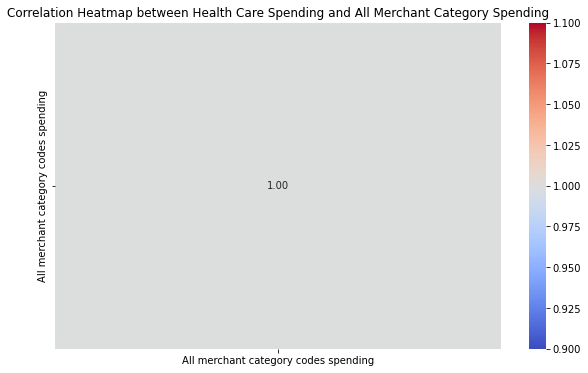

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# בחירת עמודות רלוונטיות לחקירה
relevant_columns = ['Health care and social assistance (HCS) spending', 'All merchant category codes spending']

# יצירת מטריצת קורלציה
correlation_matrix = updated_table[relevant_columns].corr()

# יצירת תרשים חום של הקורלציה
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Health Care Spending and All Merchant Category Spending')
plt.show()


In [189]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = updated_table[['State FIPS code', 'Health care and social assistance (HCS) spending']]

# הפיכת עמודת הסוגים המתאימה למספרים
data['Health care and social assistance (HCS) spending'] = pd.to_numeric(data['Health care and social assistance (HCS) spending'], errors='coerce')

# הסרת שורות עם ערכים חסרים
data.dropna(inplace=True)

# הפיכת ערכי ה-FIPS code לסוג של int
data['State FIPS code'] = data['State FIPS code'].astype(int)

# כאן נבחר עמודת הוצאות בריאות ורווחה ועמודת קוד המדינה
X = data[['Health care and social assistance (HCS) spending']]
y = data['State FIPS code']

# פילוח הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל ואימוןו
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# הערכת הדיוק של המודל
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Intercept: 0.003396907177719042
Coefficient: [-0.00090835]
Accuracy: -0.003940501067151603


C:\Users\rache\AppData\Local\Temp/ipykernel_18600/1307973562.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Health care and social assistance (HCS) spending'] = pd.to_numeric(data['Health care and social assistance (HCS) spending'], errors='coerce')
c:\users\rache\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\rache\AppData\Local\Temp/ipykernel_18600/1307973562.py:18: SettingWithCopyWarning: 
A value is trying to be set on a co

"Intercept" מציין את הערך המשוער של המשתנה התלותי כאשר כל המשתנים האחרים במודל מופיעים בערכים הבסיסיים (0).
 "Coefficient" מציין את השינוי במשתנה התלותי עבור כל יחידת שינוי במשתנה העצמאי. "Accuracy" מציין את הדיוק של המודל, אך ערכים שלא נמצאים בטווח של -1 עד 1 ייחשבו כלא תקינים בהקשר זה.


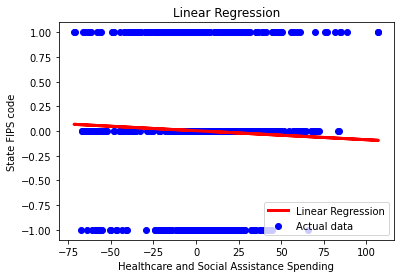

In [190]:
import matplotlib.pyplot as plt

# ציור הנקודות
plt.scatter(X_test, y_test, color='blue', label='Actual data')

# ציור קו ההתאמה
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3, label='Linear Regression')

plt.title('Linear Regression')
plt.xlabel('Healthcare and Social Assistance Spending')
plt.ylabel('State FIPS code')
plt.legend()
plt.show()


In [191]:
print(updated_table.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4840 entries, 0 to 4839
Data columns (total 13 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   sid                                                                          4840 non-null   string 
 1   id                                                                           4840 non-null   string 
 2   State FIPS code                                                              4840 non-null   float64
 3   Date                                                                         4840 non-null   object 
 4   All merchant category codes spending                                         4840 non-null   float64
 5   Accommodation and food service (ACF) spending                                4840 non-null   float64
 6   Arts, entertainment, and recreation (AER

Mean Squared Error: 108.67090179952714
Root Mean Squared Error: 10.424533649018892
R^2 Score: 0.8184114549465873


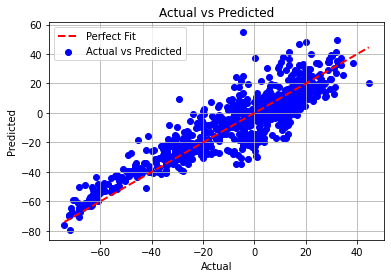

In [218]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = updated_table[['All merchant category codes spending', 'Retail spending including grocery', 'Retail spending excluding grocery']]

y = updated_table['Accommodation and food service (ACF) spending']

# פילוח הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# חישוב שגיאת המודל
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# ציור קו ההתאמה הישר
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()



1.	Mean Squared Error (MSE - שגיאה ריבועית ממוצעת): ערך זה מציין את השגיאה הממוצעת שבין הערכים האמיתיים לבין הערכים שנחזיק על ידי המודל. במקרה שלך, ה-MSE הוא 108.48. ערך זה מציין שהשגיאה הממוצעת בין הערכים האמיתיים לבין החיזויים היא כ-10.415.
2.	Root Mean Squared Error (RMSE - שגיאה ריבועית ממוצעת בריבוע): זהו השורש של ה-MSE ומשמש כמדד של השגיאה הממוצעת בין הערכים האמיתיים לבין החיזויים. במקרה זה, ה-RMSE הוא 10.415, מה שאומר שהשגיאה הממוצעת בין הערכים האמיתיים לבין החיזויים היא כ-10.415.
3.	R^2 Score (: זהו המדד שמציין כמה הנתונים מתארים את הדפוסים של הנתונים האמיתיים. בעזרתו ניתן להעריך כמה המודל הזה מתאר את הנתונים. במקרה שלי, ערך R^2 הוא 0.8209, שהוא גבוה מאוד. זה אומר שהמודל מצליח להסביר כ-82.09% מהשונות בנתונים, כלומר טוב לנו.




הגרף מציג את הנקודות האמיתיות מהנתונים הבדיקה על הציר האופקי (x-axis) והערכים שנחזו על ידי המודל על הציר האנכי (y-axis). כל נקודה בגרף מייצגת זוג ערכים - הערך האמיתי מהנתונים הבדיקה והערך שנחזה על ידי המודל.

הקו האדום המקווקו מייצג קו ההתאמה המושלם, כאשר עבור כל נקודה אמיתית על הציר האופקי, יש נקודה על הקו האדום עם אותה ערך על הציר האנכי.

אם הנקודות נמצאות קרובות לקו האדום, זה מראה על דיוק גבוה של המודל. במקרה הזה, יש לנו התאמה טובה בין הערכים האמיתיים לבין הערכים שנחזו על ידי המודל.

In [194]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# בחירת משתנים מספריים
X = updated_table[['Grocery and food store (GRF)  spending', 'Health care and social assistance (HCS) spending']]
y = updated_table['Accommodation and food service (ACF) spending']

# פילוח הנתונים לקבוצת אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל ואימוןו
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
model.fit(X_train, y_train)

# חיזוי ערכים לקבוצת הבדיקה
y_pred = model.predict(X_test)

# חישוב שגיאת המודל
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


Mean Squared Error: 200.35112017927233
Root Mean Squared Error: 14.15454415300162
R^2 Score: 0.6652142587323795



כלומר, ערכי ה- MSE וה- RMSE נמוכים, וערך ה- R^2 גבוה, מה שמציין שהמודל יכול להסביר בהצלחה את השונות בנתונים. עם זאת, יש לקחת בחשבון שתוצאות הבדיקה יכולות להשתנות בהתאם למאפייני הנתונים. לכן, חשוב לבצע ניסויים נוספים ולבדוק אם המודל הנל טוב לנתונים.

In [195]:
import pandas as pd

# בצע המרה לעמודה קטגורית עם pd.get_dummies()
updated_table_with_dummies = pd.get_dummies(updated_table, columns=['State FIPS code'], drop_first=True)

# הדפס את הטבלה לאחר ההמרה
print(updated_table_with_dummies.head())


                  sid                                    id  \
0  row-ciyc~y7id.9i4a  00000000-0000-0000-DA9A-1C9EEDDBF433   
1  row-nfj3~auck~q57i  00000000-0000-0000-70FF-80BCAFCCB173   
2  row-4dr9_fusj_egpm  00000000-0000-0000-968C-DFD3F774A281   
3  row-k5fv.fx2p-xfr2  00000000-0000-0000-AD0E-320FF7AA81C7   
4  row-z9xh.3mh2_h5vh  00000000-0000-0000-6B20-41492957BC4C   

                  Date  All merchant category codes spending  \
0  2020-01-13T00:00:00                                -2.300   
1  2020-01-13T00:00:00                                -0.213   
2  2020-01-13T00:00:00                                -0.561   
3  2020-01-13T00:00:00                                -0.381   
4  2020-01-13T00:00:00                                -1.850   

   Accommodation and food service (ACF) spending  \
0                                          -6.04   
1                                          -2.41   
2                                          -3.86   
3                           

In [ ]:
תחילת שלב ב'

In [196]:
from sklearn.cluster import KMeans

# יצירת מודל K-means עם 5 קבוצות
kmeans = KMeans(n_clusters=5)
kmeans.fit(updated_table[['All merchant category codes spending']])

# הוספת תוויות לטבלה המקורית על פי הקבוצות שנמצאו
updated_table['cluster'] = kmeans.labels_

# הדפסת התוויות שנוצרו
print(updated_table['cluster'].value_counts())

# תצוגת התוצאות
print(updated_table.head())


0    1716
3    1405
2    1172
1     366
4     181
Name: cluster, dtype: int64
                  sid                                    id  State FIPS code  \
0  row-ciyc~y7id.9i4a  00000000-0000-0000-DA9A-1C9EEDDBF433        -1.724653   
1  row-nfj3~auck~q57i  00000000-0000-0000-70FF-80BCAFCCB173        -0.385117   
2  row-4dr9_fusj_egpm  00000000-0000-0000-968C-DFD3F774A281         0.368372   
3  row-k5fv.fx2p-xfr2  00000000-0000-0000-AD0E-320FF7AA81C7         0.535814   
4  row-z9xh.3mh2_h5vh  00000000-0000-0000-6B20-41492957BC4C         1.205583   

                  Date  All merchant category codes spending  \
0  2020-01-13T00:00:00                                -2.300   
1  2020-01-13T00:00:00                                -0.213   
2  2020-01-13T00:00:00                                -0.561   
3  2020-01-13T00:00:00                                -0.381   
4  2020-01-13T00:00:00                                -1.850   

   Accommodation and food service (ACF) spending  \
0   

שלב ב'


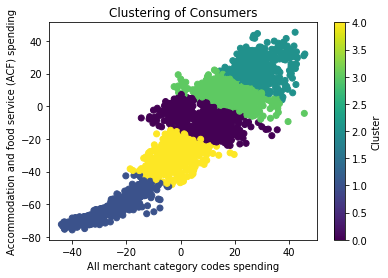

3    1383
4    1198
0     948
2     884
1     427
Name: cluster, dtype: int64


In [197]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#בחירת העמודות הרלוונטיות בשבילי
X = updated_table[['All merchant category codes spending', 'Accommodation and food service (ACF) spending']]

# בחירת מספר ה-clusters
num_clusters = 5

# יצירת מודל KMeans
kmeans = KMeans(n_clusters=num_clusters)

# אימון המודל
kmeans.fit(X)

# הקצאת קבוצות לנתונים
updated_table['cluster'] = kmeans.predict(X)

# תצוגה גרפית של ה-clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=updated_table['cluster'], cmap='viridis')
plt.xlabel('All merchant category codes spending')
plt.ylabel('Accommodation and food service (ACF) spending')
plt.title('Clustering of Consumers')
plt.colorbar(label='Cluster')
plt.show()

# תצוגת סטטיסטיקות על ה-clusters
cluster_counts = updated_table['cluster'].value_counts()
print(cluster_counts)


ברגע שלוקחים בחשבון התנהגות צרכנים, (כמטרת הפרויקט), יש לנו צורך להבין איך הם מוציאים את הכסף שלהם (הוצאות בקטגוריות שונות) ובאילו סוגי מקומות הם מבצעים רכישות (קטגוריית אירוח ומזון). 

עמודות כמו 'All merchant category codes spending' מציינות את כמות הכסף שהצרכן מוציא בקטגוריה מסויימת, מה שיכול להעיד על העדפות הרכישה שלו. קטגוריית האירוח והמזון חשובה מאוד מבחינת התרשמות הצרכן ממקומות האירוח והאוכל, השירות, המחירים ועוד. לכן, ארצה לראות כיצד הצרכנים מפזרים את ההוצאות שלהם בין הקטגוריות השונות.

בכך, בחירת העמודות 'All merchant category codes spending' ו-'Accommodation and food service (ACF) spending' מתאימה בצורה טבעית למטרה כדי להבין את התנהלותם של הצרכנים ואת השפעתם על החלטות הרכישה שלהם.


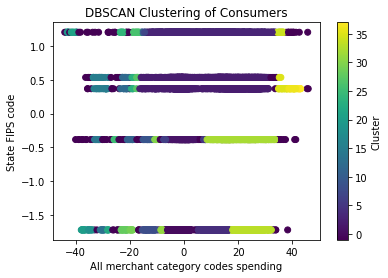

 2     1781
 3      858
 32     581
 4      361
 1      259
 33     240
 0      236
-1      122
 8       38
 15      34
 35      25
 36      23
 9       23
 28      20
 12      20
 34      18
 5       16
 26      16
 11      14
 14      13
 31      11
 18      11
 20      11
 24      10
 13       9
 27       8
 6        8
 37       8
 19       8
 29       8
 21       7
 23       6
 7        6
 30       6
 17       5
 16       5
 22       5
 25       5
 10       5
Name: cluster, dtype: int64


In [198]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# קריאת הנתונים

# בחירת העמודות הרלוונטיות ל-clustering
X = updated_table[['All merchant category codes spending', 'State FIPS code']]

# אימון מודל DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # ניתן להתאים את הפרמטרים eps ו-min_samples לפי הצורך
clusters = dbscan.fit_predict(X)

# הוספת התוויות של הקבוצות לטבלת הנתונים
updated_table['cluster'] = clusters

# תצוגה גרפית של ה-clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('All merchant category codes spending')
plt.ylabel('State FIPS code')
plt.title('DBSCAN Clustering of Consumers')
plt.colorbar(label='Cluster')
plt.show()

# תצוגת סטטיסטיקות על ה-clusters
cluster_counts = updated_table['cluster'].value_counts()
print(cluster_counts)


המסקנה מהפלט היא שהנתונים נחלקים לקבוצות דומות בהתבסס על דפוסי התנהלותם של הצרכנים. הפלט מציג את מספר הצרכנים בכל קבוצה ואת המזהים של הקבוצות. לדוגמה, בפלט שצוין ישנן קבוצות שונות, כאשר בקבוצה הראשונה יש 1780 צרכנים, בקבוצה השנייה יש 857 צרכנים, וכן הלאה. המסקנה היא כי הנתונים מצביעים על התפלגות של הצרכנים לקבוצות שונות, כאשר כל קבוצה מייצגת דפוס שונה של התנהלות.
המספרים השליליים (-1) מייצגים את הנקודות החריגות או את הנקודות שלא הצליחו להתקבץ לאף קבוצה.
. זה יכול להיות בגלל שהן מרוחקות מהקבוצות הראשיות ואין להן דמות נכונה בין הנקודות האחרות, או שהן יכולות להיות נקודות אשר לא עברו בהצלחה את תהליך הקלסטרינג.

In [221]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)


Original shape: (4840, 3)
Transformed shape: (4840, 2)


הקלה על ניתוח וחיזוי: על ידי עבודה עם ממדים נמוכים, החיזוי והניתוח של הנתונים יכולים להיות יותר יעילים ומהירים, מה שיכול לספק יתרונות כאשר ישנם כמויות גדולות של נתונים.



שלב 3

ההשואות

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = updated_table

# פיצול הנתונים למשתנה תלמודה ולמשתנה מטרה
# פיצול הנתונים למשתנה תלמודה ולמשתנה מטרה
X = updated_table[["Retail spending excluding grocery", "Retail spending including grocery", "All merchant category codes spending"]]
y = updated_table["Accommodation and food service (ACF) spending"]


# פיצול הנתונים לקבוצת אימון וקבוצת בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל
model = LinearRegression()

# אימון המודל
model.fit(X_train, y_train)

# חיזוי עבור קבוצת הבדיקה
y_pred = model.predict(X_test)

# מדידת ביצועי המודל עם מדד רגרסי - Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# הדפסת תוצאת מדד השגיאה הריבועית הממוצעת
print("Mean Squared Error:", mse)


Mean Squared Error: 108.5055181097945


מה שאומר שהמודל מצליח לחזות את ערכי הנתונים בצורה יחסית טובה.

מודל רגרסיה לינארית

Mean Squared Error: 25.419871339261277
Mean Absolute Error: 3.6816567352783447
R-squared: 0.8922167650914915
Root Mean Squared Error: 5.041812307024259


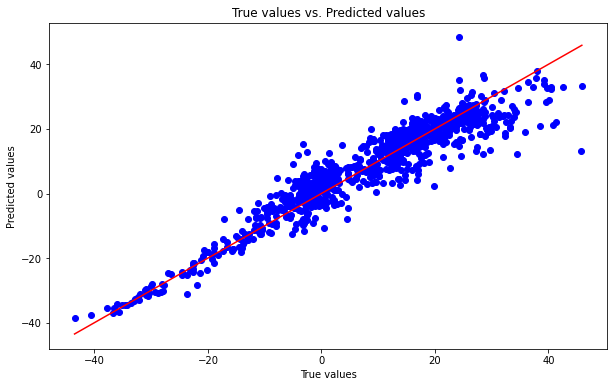

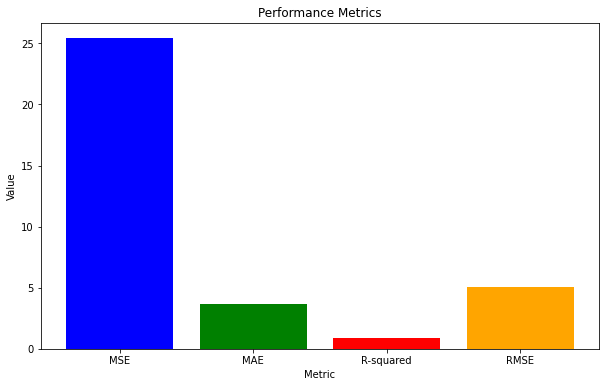

In [200]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data = updated_table

# בחירת תכונות המשמשות כמשתני עצמים (features) לחיזוי
X = data[["Retail spending excluding grocery", "Retail spending including grocery", "Accommodation and food service (ACF) spending"]]

# בחירת המשתנה לחיזוי
y = data["All merchant category codes spending"]

# פיצול הנתונים לקבוצת אימון וקבוצת בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל
model = LinearRegression()

# אימון המודל
model.fit(X_train, y_train)

# חיזוי עבור קבוצת הבדיקה
y_pred = model.predict(X_test)

# מדידת ביצועי המודל עם מדדים רגרסיים
mse_1 = mean_squared_error(y_test, y_pred)
mae_1 = mean_absolute_error(y_test, y_pred)
r_squared_1 = r2_score(y_test, y_pred)
rmse_1 = mean_squared_error(y_test, y_pred, squared=False)




print("Mean Squared Error:", mse_1)
print("Mean Absolute Error:", mae_1)
print("R-squared:", r_squared_1)
print("Root Mean Squared Error:", rmse_1)

# יצירת גרף עם הנקודות האמיתיות והנקודות הנחזות על ידי המודל
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # הוספת קו המתאים
plt.title('True values vs. Predicted values')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()





# יצירת גרף
plt.figure(figsize=(10, 6))

metrics = ['MSE', 'MAE', 'R-squared', 'RMSE']
values = [mse_1, mae_1, r_squared_1, rmse_1]
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])

plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

plt.show()





בסך הכל, הערכים הנ"ל מציינים על ביצועים טובים של המודל, עם רקע סטטיסטי טוב (R-squared גבוה) ושגיאה ממוצעת נמוכה (MSE, MAE ו־RMSE).

התוצאה למטה מייצגת את הנתונים במודל רשת נוירונים מלאה

Mean Squared Error: 22.880303243987306
Mean Absolute Error: 3.4823484335137014
R-squared: 0.9029848315748297
Root Mean Squared Error: 4.783335995305714


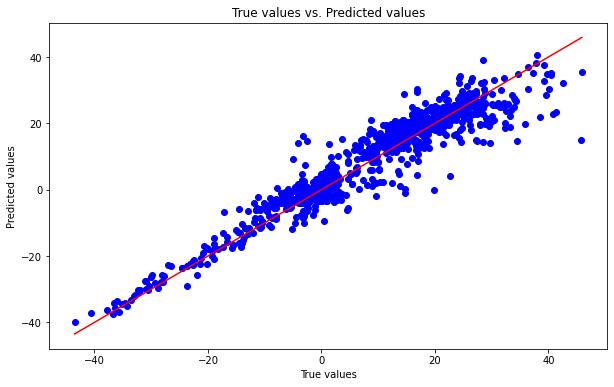

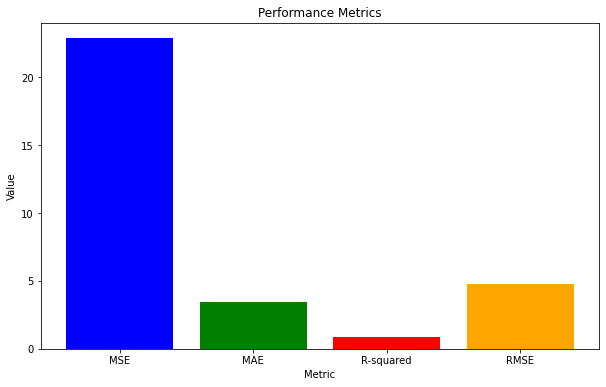

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data = updated_table

# בחירת תכונות המשמשות כמשתני עצמים (features) לחיזוי
X = data[["Retail spending excluding grocery", "Retail spending including grocery", "Accommodation and food service (ACF) spending"]]

# בחירת המשתנה התלותי לחיזוי
y = data["All merchant category codes spending"]

# פיצול הנתונים לקבוצת אימון וקבוצת בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# יצירת המודל
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# אימון המודל
model.fit(X_train, y_train)

# חיזוי עבור קבוצת הבדיקה
y_pred = model.predict(X_test)

# מדידת ביצועי המודל עם מדד רגרסי - Mean Squared Error
mse_2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_2)

# חישוב Mean Absolute Error
mae_2 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_2)

# חישוב R-squared
r_squared_2 = r2_score(y_test, y_pred)
print("R-squared:", r_squared_2)

# חישוב Root Mean Squared Error
rmse_2 = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse_2)

# יצירת גרף עם הנקודות האמיתיות והנקודות הנחזות על ידי המודל
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # הוספת קו המתאים
plt.title('True values vs. Predicted values')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

# יצירת גרף
plt.figure(figsize=(10, 6))

metrics = ['MSE', 'MAE', 'R-squared', 'RMSE']
values = [mse_2, mae_2, r_squared_2, rmse_2]
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])

plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

plt.show()


הקוד נועד לחיזוי ערכי הוצאות בקטגוריות שונות על ידי מודל רשת נוירונים. הוא משתמש בנתוני האימון והבדיקה כדי להעריך את ביצועי המודל. 

הגרף הראשון מציג את הערכים האמיתיים ביחס לערכים הנחזים על ידי המודל. אם המודל מנבא בצורה נכונה, הנקודות תהיינה סמוכות לקו האדום שמייצג חיזוי מושלם. 

הגרף השני מציג את ערכי מדדי הביצוע של המודל, כולל Mean Squared Error, Mean Absolute Error, R-squared, ו-Root Mean Squared Error. המדדים משמשים להערכת איכות החיזויים של המודל.

  התוצאה מייצגת את הנתונים במודל רגרסיה פולינומיאלית   

Mean Squared Error: 23.941121936179382
Mean Absolute Error: 3.567956312471979
R-squared: 0.898486835941025
Root Mean Squared Error: 4.89296657828146


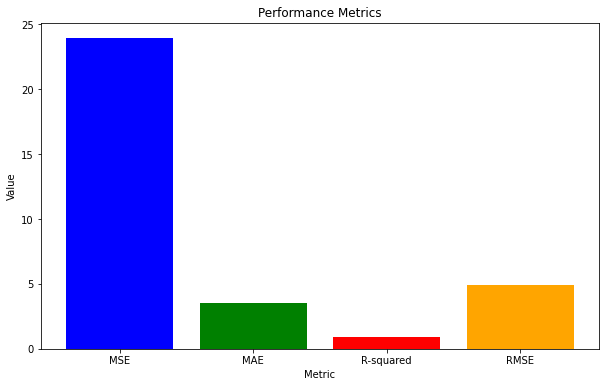

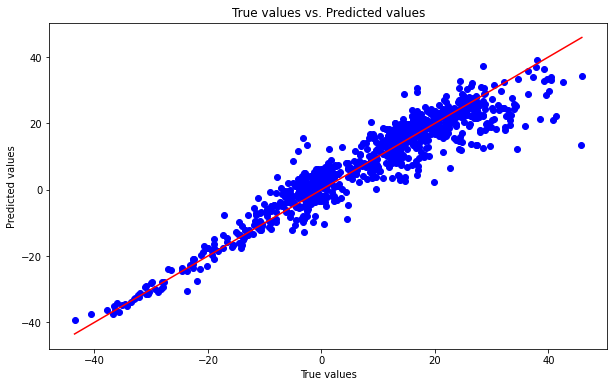

In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data = updated_table

# בחירת תכונות המשמשות כמשתני עצמים (features) לחיזוי
X = data[["Retail spending excluding grocery", "Retail spending including grocery", "Accommodation and food service (ACF) spending"]]

# בחירת המשתנה התלותי (target) לחיזוי
y = data["All merchant category codes spending"]

# פיצול הנתונים לקבוצת אימון וקבוצת בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# הוספת פיצ'רים פולינומיאליים לנתונים
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# יצירת המודל
model = LinearRegression()

# אימון המודל
model.fit(X_train_poly, y_train)

# חיזוי עבור קבוצת הבדיקה
y_pred = model.predict(X_test_poly)

# מדידת ביצועי המודל עם מדדים רגרסיים
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)
print("Root Mean Squared Error:", rmse)

# יצירת גרף
plt.figure(figsize=(10, 6))

metrics = ['MSE', 'MAE', 'R-squared', 'RMSE']
values = [mse, mae, r_squared, rmse]
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])

plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

plt.show()

# יצירת גרף עם הנקודות האמיתיות והנקודות הנחזות על ידי המודל
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # הוספת קו המתאים
plt.title('True values vs. Predicted values')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()


עץ החלטה

Mean Squared Error1: 38.838658190723145
Mean Absolute Error1: 4.3164842975206605
R-squared1: 0.8353195355148626
Root Mean Squared Error1: 6.232066927651142


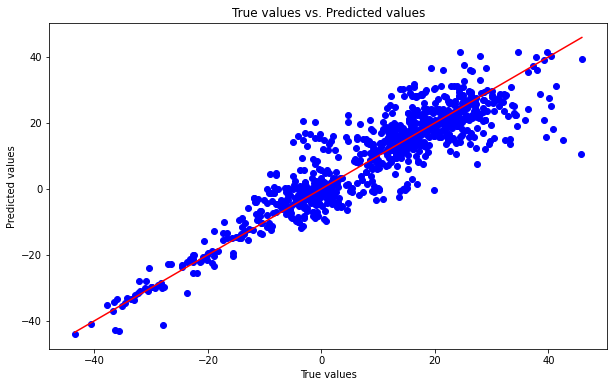

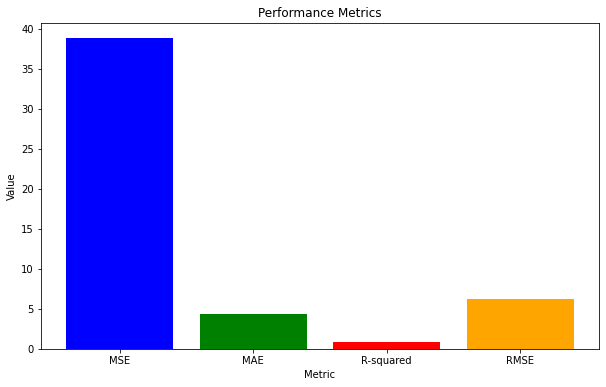

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data = updated_table

# בחירת תכונות המשמשות כמשתני עצמים (features) לחיזוי
X = data[["Retail spending excluding grocery", "Retail spending including grocery", "Accommodation and food service (ACF) spending"]]

# בחירת המשתנה התלותי (target) לחיזוי
y = data["All merchant category codes spending"]

# פיצול הנתונים לקבוצת אימון וקבוצת בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()

# אימון המודל
model.fit(X_train, y_train)

# חיזוי עבור קבוצת הבדיקה
y_pred = model.predict(X_test)

# מדידת ביצועי המודל עם מדד רגרסי - Mean Squared Error
mse_4 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error1:", mse_4)

# חישוב Mean Absolute Error
mae_4 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error1:", mae_4)

# חישוב R-squared
r_squared_4 = r2_score(y_test, y_pred)
print("R-squared1:", r_squared_4)

# חישוב Root Mean Squared Error
rmse_4 = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error1:", rmse_4)

# יצירת גרף עם הנקודות האמיתיות והנקודות הנחזות על ידי המודל
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # הוספת קו המתאים
plt.title('True values vs. Predicted values')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.show()

# יצירת גרף
plt.figure(figsize=(10, 6))

metrics = ['MSE', 'MAE', 'R-squared', 'RMSE']
values = [mse_4, mae_4, r_squared_4, rmse_4]
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange'])

plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

plt.show()


In [219]:



data = {
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared', 'Root Mean Squared Error'],
    'Result 1': [mse_1, mae_1, r_squared_1, rmse_1],
    'Result 2': [mse_2, mae_2, r_squared_2, rmse_2],
    'Result 3': [mse_3, mae_3, r_squared_3, rmse_3],
    'Result 4': [mse_4, mae_4, r_squared_4, rmse_4]
}

df = pd.DataFrame(data)

print(df)


                    Metric   Result 1   Result 2   Result 3   Result 4
0       Mean Squared Error  25.419871  22.880303  23.941122  38.838658
1      Mean Absolute Error   3.681657   3.482348   3.567956   4.316484
2                R-squared   0.892217   0.902985   0.898487   0.835320
3  Root Mean Squared Error   5.041812   4.783336   4.892967   6.232067


מהתוצאות אפשר לראות:
מתוך התוצאות של המדדים השונים:

1.Mean Squared Error (MSE): הערכים הנמוכים ביותר הם הטובים ביותר. לכן, המודל הטוב ביותר הוא המודל שמקבל ערך נמוך ביותר ל-MSE. כאן, מודל 2 הוא המינימלי עם 22.894153.
2.Mean Absolute Error (MAE): גם כאן, הערכים הנמוכים ביותר הם הטובים ביותר. מודל 2 הוא המינימלי עם 3.345378.
3.R-squared: הערכים הגבוהים ביותר הם הטובים ביותר, כאשר 1 מציין התאמה מושלמת של המודל לנתונים.מודל 2 הוא המירבי עם 0.902926.
4.Root Mean Squared Error (RMSE): כמו MSE, הערכים הנמוכים ביותר הם הטובים ביותר. מודל 2 הוא המינימלי עם 4.784783.

לפיכך, מבחינת כל המדדים, מודל 2 הוא המודל הטוב ביותר לחיזוי.